In [2]:
import numpy as np
import pypolycontain as pp

/home/sadra/Dropbox (MIT)/pypolycontain/pypolycontain/conversions.py:164: UserWarning: Zonotope Vertex Enumeration:                       The number of generators 15 is very large.                       Resorting to ray shooting
  Resorting to ray shooting'%q)


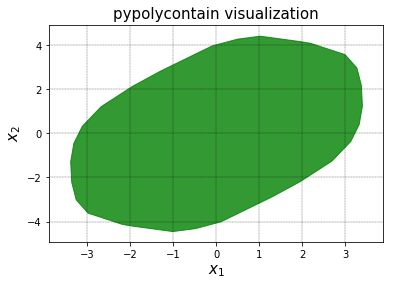

In [9]:
q_o,n=15,2
Z=pp.zonotope(x=np.zeros((n,1)),G=np.random.random((n,q_o))-0.5)
pp.visualize([Z])

In [20]:
# Z_i=pp.zonotope(x=np.zeros((n,1)),G=G)
import pydrake.solvers.mathematicalprogram as MP
# use SOCS solver
import pydrake.solvers.scs as SCS
mysolver=SCS.ScsSolver()

success


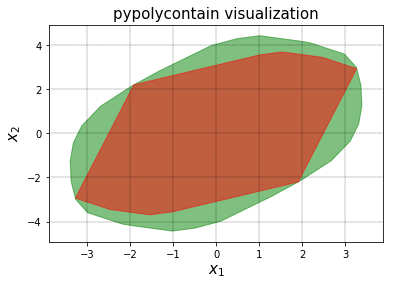

In [37]:
L=5
program=MP.MathematicalProgram()
G=program.NewSymmetricContinuousVariables(n,'G') 
program.AddPositiveSemidefiniteConstraint(G)
program.AddMaximizeLogDeterminantSymmetricMatrixCost(G)
Z_i=pp.zonotope(x=np.zeros((n,1)),G=G) 
Z.G=np.fliplr(Z.G)
Z_o=pp.zonotope(G=Z.G[:,:q_o-L+n])
pp.subset(program,Z_i,Z_o)
result=mysolver.Solve(program,None,None)
if result.is_success():
    print("success")
    G_n=result.GetSolution(G)
else:
    print("not succesfull") 
Z_i_n=pp.zonotope(x=np.zeros((n,1)),G=np.hstack(( G_n , Z.G[:,q_o-L+n:])),color='red')
pp.visualize([Z,Z_i_n],alpha=0.5)

In [35]:
Z_i_n.G.shape

(2, 5)